# Too Much Information Preliminary Experiment

The aim of this experiment is to determine whether or not too much information is given in the context surrounding particular negative events when involving members of (for example) a minority group.

### 1. Setup Experiment

For this experiment 30 articles will be loaded in. These articles have been extracted using the BingAPI with the search keyword being "murder". The result is stored in a python pickle located in the data folder for tmi. 

In [1]:
import pickle
murder_articles = pickle.load(open("../../data/articles/article_dict.pkl", "rb"))

In the next step we will import the necessary methods to conduct the experiment. There are two files containing the necessary classes. 

In [2]:
from python_code.tmi_logic import TMIAnalysis
from python_code.helperfunctions import Helperfunctions, DescriptorAnalysis

In [3]:
%load_ext autoreload
%autoreload 2

---

### 2. Create Initial Dataframe

To create our initial dataframe we pass the articles (murder_articles) to the class "TMIAnalysis". In the background a dataframe is created containing the columns: 
- URL (index)
- article_content
- news_outlet
- headline

Furthermore, a first cleaning step is initiliased, eliminating unnecessary sentence punctuation. 

In [4]:
TMI_analysis = TMIAnalysis(murder_articles)

We can access the dataframe throughout the entire experiment by calling the property <b>"dataframe"</b> on our object TMI_analysis.

In [5]:
TMI_analysis.dataframe.head(1)

,headline,newsoutlet_name,article_content
URL,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,From humiliating defendants to giving them wid...,msn,"KENOSHA, Wis. — In the weeks leading up to Kyl..."


---

### 3. Filter Articles 

While the BingAPI is able to return articles for a specfic keyword (in our case "murder"), there might be certain articles that we are not interested in. For example an article talking about a murder TV series. <br> To filter these articles out we utilise <b>Watson Natural Language Understanding</b>. We provide a category so that in the following step all articles not belonging in that category are filtered out.
At the same time Watson NLU classifies <b>entities</b> in the headline which are added as a column to the dataframe.


We are only interested in articles belonging to the category <i>"/society/crime"</i>.

Categories can be found at: https://cloud.ibm.com/docs/natural-language-understanding?topic=natural-language-understanding-categories-hierarchy-v1

In [6]:
TMI_analysis.filter_out_articles("/society/crime")

removed https://www.cbsnews.com/news/heather-mack-bail-american-woman-convicted-suitcase-murder-mother-indonesia-freed/
removed https://www.sfgate.com/news/article/US-woman-in-Bali-suitcase-murder-freed-from-jail-16573503.php
removed https://www.msn.com/en-us/travel/tripideas/off-hours-celebrate-halloween-in-des-moines-with-spooky-movies-pie-in-a-glass-and-murder-mysteries/ar-AAQ619x


---

### 4. Find Ethnicity Keywords in Articles

Find ethnicity keywords in the article text. For each found keyword a column with the count of that ethnicity in the article text is appended to the dataframe.

<i>Source for ethnicity keywords:</i> https://jech.bmj.com/content/58/6/441

In [7]:
TMI_analysis.find_ethnicity_keywords()
print(TMI_analysis.dataframe.info())


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH to https://www.mercurynews.com/2021/10/27/long-beach-school-officer-who-fatally-shot-18-year-old-woman-charged-with-murder/
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   headline         23 non-null     object
 1   newsoutlet_name  23 non-null     object
 2   article_content  23 non-null     object
 3   black            23 non-null     int64 
 4   color            23 non-null     int64 
 5   foreign          23 non-null     int64 
 6   foreigner        23 non-null     int64 
 7   japanese         23 non-null     int64 
 8   white            23 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 2.4+ KB
None


,black,color,foreign,foreigner,japanese,white
URL,,,,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,1,1,0,0,0,7
https://news.yahoo.com/former-nypd-officer-sentenced-murder-043640505.html,0,0,0,0,0,0
https://news.yahoo.com/man-arrested-charged-murder-case-212316423.html,1,0,0,0,1,1
https://www.washingtonpost.com/nation/2021/10/28/california-high-school-officer-charged-murder/,0,0,0,0,0,0
https://www.msn.com/en-us/news/crime/woman-in-bali-suitcase-murder-to-be-deported-to-us-without-her-daughter/ar-AAQ5G2V,0,0,1,0,0,0
https://www.chicagotribune.com/news/criminal-justice/ct-chicago-police-wrongful-conviction-lawsuit-verdict-eddie-bolden-20211029-oj7wm5vadzeazmndcdsscyscni-story.html,0,0,0,0,0,0
https://www.msn.com/en-us/news/crime/three-men-charged-with-murder-in-fatal-stabbing-victim-identified-as-19-year-old-norwalk-man/ar-AAQ631V,0,0,0,0,0,0
https://www.nbcnews.com/news/world/us-woman-imprisoned-mothers-suitcase-murder-bali-freed-jail-rcna4078,0,0,0,0,0,0
https://www.mlive.com/news/saginaw-bay-city/2021/10/man-testifies-from-prison-that-juvenile-cousin-did-not-participate-in-rape-murder-of-18-year-old-in-1997.html,0,0,0,0,0,2


---

### 5. Does Print Medium influence Article Length?

Evaluation of whether or not a newspaper length is dependent upon the print medium type. Either a newspaper outlet is online only or print & online. However, usually the print & online publish the same article both mediums. 

<i>Are online articles therefore always shorter for print & online newspaper due to space limitations in the print medium? </i>

Unfortuantely, there is no API determining the medium type of a newspaper, so the method requires a manualy typed list of the types of newspapers in the dataframe.


As Watson NLP sometimes classifies the loaded in articles differently, we need to load in the <b>saved dataframe</b> to make sure this analysis functions. 

In [22]:
TMI_analysis.dataframe = pickle.load(open("../../data/tmi/saved_dataframe.pkl", "rb"))

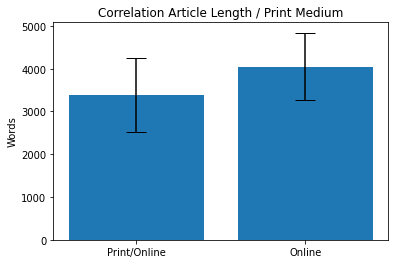

In [26]:
import matplotlib.pyplot as plt
newspaper_types = ["online", "online", "online", "print", "online", "print", "online", "online", "print", "print", "print", "print", "print", "print", "online", "online", "online", "print", "online", "online", "online", "print", "print"]

x = TMI_analysis.article_length_mediatype_correlation(newspaper_types)[0]
error = TMI_analysis.article_length_mediatype_correlation(newspaper_types)[1]
averages = TMI_analysis.article_length_mediatype_correlation(newspaper_types)[2]

plt.bar(x, averages, yerr=error, ecolor="black", capsize=10)
plt.ylabel("Words")
plt.title("Correlation Article Length / Print Medium")
plt.show()


---

### 6. Does Object in Headline correspond to Context?

Example: *"Daycare Worker Charged With <b>Murder</b> After Assaulting Baby Who Wouldn’t Nap, Cops Say"*
The object (Murder) corresponds to the context (Murder).

An object not corresponding with the context might be framing bias. E.g. the object is the age of the murderer or the location of the murder.

In our case the context == <b>"murder"</b>

In [30]:
TMI_analysis.object_correspond_context("murder")
TMI_analysis.dataframe.head(1)

,headline,newsoutlet_name,article_content,headline_length,article_length,newspaper_type,HL_Subject,HL_Action,HL_Object,object_correspond_context_HL
URL,,,,,,,,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,From humiliating defendants to giving them wid...,msn,"KENOSHA, Wis. — In the weeks leading up to Kyl...",151,10922,online,"[the ‘confident’ judge, Kyle Rittenhouse, the ...","[overseeing, s, does]",[Kyle Rittenhouse’s murder trial doesn’t shy f...,True


---

### 7. Is Subject an Entity of Type Person?

The subject not being a named person might indicate a framing bias, especially if the person is later named in the article.

In [31]:
TMI_analysis.is_subject_entity_person()

/Users/lucaweissbeck/Documents/VSCProjects/NLP/media-bias-t4j-4374/src/tmi/python_code/tmi_logic.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[i]["entities"] = result_dict["entities"]


In [32]:
TMI_analysis.dataframe.head(1)

,headline,newsoutlet_name,article_content,headline_length,article_length,newspaper_type,HL_Subject,HL_Action,HL_Object,object_correspond_context_HL,entities,entity_and_person
URL,,,,,,,,,,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,From humiliating defendants to giving them wid...,msn,"KENOSHA, Wis. — In the weeks leading up to Kyl...",151,10922,online,"[the ‘confident’ judge, Kyle Rittenhouse, the ...","[overseeing, s, does]",[Kyle Rittenhouse’s murder trial doesn’t shy f...,True,,False


---

### 8. Political Spectrum of News Outlet

Using a web crawler to acquire the political leaning of a newspaper. Data is provided by the website:
https://www.allsides.com/media-bias/media-bias-ratings

Output:
- Left
- Lean Left
- Center
- Lean Right
- Right

In [34]:
TMI_analysis.political_spectrum()

In [35]:
TMI_analysis.dataframe.head(1)

,headline,newsoutlet_name,article_content,headline_length,article_length,newspaper_type,HL_Subject,HL_Action,HL_Object,object_correspond_context_HL,entities,entity_and_person,political_spectrum
URL,,,,,,,,,,,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,From humiliating defendants to giving them wid...,msn,"KENOSHA, Wis. — In the weeks leading up to Kyl...",151,10922,online,"[the ‘confident’ judge, Kyle Rittenhouse, the ...","[overseeing, s, does]",[Kyle Rittenhouse’s murder trial doesn’t shy f...,True,,False,Left


---

### 9. Subjectivity in Headline

Measure how subjective the words in headline are. 0 == fact, 1 == opinion.

In [36]:
from textblob import TextBlob
sub = lambda x: TextBlob(x).sentiment.subjectivity
TMI_analysis.dataframe['subjectivity_HL'] = round(TMI_analysis.dataframe['headline'].apply(sub), 2)

In [37]:
TMI_analysis.dataframe.head(1)

,headline,newsoutlet_name,article_content,headline_length,article_length,newspaper_type,HL_Subject,HL_Action,HL_Object,object_correspond_context_HL,entities,entity_and_person,political_spectrum,subjectivity_HL
URL,,,,,,,,,,,,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,From humiliating defendants to giving them wid...,msn,"KENOSHA, Wis. — In the weeks leading up to Kyl...",151,10922,online,"[the ‘confident’ judge, Kyle Rittenhouse, the ...","[overseeing, s, does]",[Kyle Rittenhouse’s murder trial doesn’t shy f...,True,,False,Left,0.58


---

### 10. Relationship Political Leaning & Subjectivity Headline

Is there a relationship between how subjective the word choice in the headline is to the political leaning of the newspaper outlet?

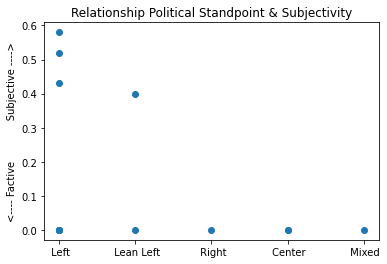

In [38]:
import matplotlib.pyplot as plt

TMI_analysis.dataframe["political_spectrum"] = TMI_analysis.dataframe["political_spectrum"].fillna(value="No Info")
x = TMI_analysis.dataframe["political_spectrum"][TMI_analysis.dataframe["political_spectrum"] != "No Info"]
y = TMI_analysis.dataframe["subjectivity_HL"][TMI_analysis.dataframe["political_spectrum"] != "No Info"]
plt.scatter(x, y)
plt.title("Relationship Political Standpoint & Subjectivity")
plt.ylabel("<---- Factive             Subjective ---->")
plt.show()

---

### 11. Count Hedges, Boosters & Factive Verbs

Count the occurences of hedges, boosters and factive verbs in the article text.
We are using the collections of words Ayobami created in preliminary experiment 4. 

In [40]:
TMI_analysis.hedges_booster_factiveverbs()

In [41]:
TMI_analysis.dataframe.head(1)

,headline,newsoutlet_name,article_content,headline_length,article_length,newspaper_type,HL_Subject,HL_Action,HL_Object,object_correspond_context_HL,entities,entity_and_person,political_spectrum,subjectivity_HL,boosters_count,hedges_count,factive_verbs_count,bias_lexicon_count
URL,,,,,,,,,,,,,,,,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,From humiliating defendants to giving them wid...,msn,"KENOSHA, Wis. — In the weeks leading up to Kyl...",151,10922,online,"[the ‘confident’ judge, Kyle Rittenhouse, the ...","[overseeing, s, does]",[Kyle Rittenhouse’s murder trial doesn’t shy f...,True,,False,Left,0.58,8,14,10,140


---

### 12. Retrieve Article Image Subheading, Byline & Excerpt

In this step we are collecting the subheading from the image displayed in the article. (If there is one). To do so, we are utilising FireFox's npm package called <b>"readibility"</b>, which filters the article of any advertisments and also offers the byline & excerpt of the article. 

<b>Important:</b> Make sure that the NodeJS API is started locally.

In [5]:
TMI_analysis.get_img_caption_byline_excerpt()

In [15]:
TMI_analysis.dataframe.loc["https://www.msn.com/en-us/news/crime/woman-in-bali-suitcase-murder-to-be-deported-to-us-without-her-daughter/ar-AAQ5G2V"]["image_captions"]

['Heather Mack listens to the judge during her verdict hearing in a courtroom on April 21, 2015 in Denpasar, Bali, Indonesia. Mack was released from prison in Indonesia on Friday and will be deported to the United States, her country of origin.']

---

### 13. Descriptor Count in Headline & Descriptor Sentiment

How many descriptors are used in the headline? The logic to determine the count is, to check whether any existing "NP" node has two or more sub nodes one of which is a "NN" node other than the extreme left. 

Possible pattern for identifying bias:

< 2 descriptors (Not Biased / Positive descriptor sentiment)

= 2 descirptors (Not Biased / Neutral descriptor sentiment)

&gt; 2 descriptors (Biased / Negative descriptor sentiment)

<b>Important:</b> Make sure to start the CoreNLP Java server locally, which is available at: 
https://stanfordnlp.github.io/CoreNLP/history.html (Tested for version 4.2.2)


Start the server with the command: 


`java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer \
-preload tokenize,ssplit,pos,lemma,ner,parse,depparse \
-status_port 9000 -port 9000 -timeout 15000 &`



In [16]:
TMI_analysis.descriptors_headline()

---

### 14. Determine Bias from Descriptor Count

Any headline containing more than 2 descriptors is labeled as "Negatively Biased", otherwise as "Not Biased"

In [19]:
TMI_analysis.is_biased_from_descriptor()

However, we also need to account for headlines containing more than 2 descriptors, which might be positively biased. They are still biased, as they are using more than 2 descriptors, however in a positive context. The author might simply be talking about a <b>positive</b> subject in a biased way.

To distinguish these cases, a <b>CoreNLP sentiment analysis</b> is performed on any sentence containing more than 2 descriptors.

In [20]:
TMI_analysis.account_for_positively_biased()

/Users/lucaweissbeck/Documents/VSCProjects/NLP/media-bias-t4j-4374/src/tmi/python_code/tmi_logic.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "Negative"] = self.dataframe["headline"][self.dataframe["descriptor_class"] == "Negative"].apply(is_postively_biased)


In [21]:
TMI_analysis.dataframe.head(1)

,headline,newsoutlet_name,article_content,image_captions,byline,excerpts,descriptor_count,descriptor_name,descriptor_sentiment,descriptor_class,headline_sentiment
URL,,,,,,,,,,,
https://www.msn.com/en-us/news/crime/from-humiliating-defendants-to-giving-them-wide-latitude-the-confident-judge-overseeing-kyle-rittenhouse-s-murder-trial-doesn-t-shy-from-controversy/ar-AAQ7DPH,From humiliating defendants to giving them wid...,msn,"KENOSHA, Wis. — In the weeks leading up to Kyl...",[Kyle Rittenhouse has been charged with fatall...,"\r\n Stacy St. Clair, Chicago T...","KENOSHA, Wis. \\\ In the weeks leading up to K...",3,"[wide, confident, Kyle Rittenhouses murder]",Negative,Negatively Biased,Negative


---

### 15. Object or Subject mentioned in Image Captions?

Check if the image captions contains the Subject or Object of the headline. 

<b>S</b> = Subject in headline

<b>O</b> = Object in headline

<b>S/O</b> = Subject & Object in headline

In [29]:
TMI_analysis.object_subject_mention_imagecaptions()

### 16. Event + Dependencies

## Final Dataframe

In [1]:
TMI_analysis.dataframe

NameError: name 'TMI_analysis' is not defined